<a href="https://colab.research.google.com/github/jnqeras/ARC/blob/master/Copia_de_Homework_Assignment_V4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recursive technical homework

## Motivation
We hope you have fun doing this task as well as learn something new.

Do not be discouraged if you find the task challenging. Feel free to research as much as you want on Google or any other resource to solve this task. You are welcome to copy code snippets from stackoverflow, tutorials, blog posts, etc to help you finish the task. Make sure you understand them though :)

The goal is to push yourself a little and see how you like solving new problems using scientific computing and data analysis.

**About colab**

Please create a duplicate of this notebook using File > Save a Copy in Drive. Share your solution via a link to your local copy of the notebook.

You can solve the entirety of this task using a free kernel running in the cloud. **Just click 'Connect' on the top right of the notebook**. You can use any python libraries you want *unless* explicitly told to code your own algorithm. **If a library you want to use is not already available from the colab runtime, go to 'Help' > 'Search code snippets' > Type 'Importing a library that is not in Colab' to learn how to install a library using pip**.


#Utils general

In [ ]:
# Fixme: evaluar ejercicio 1 con esta función (y todos los ejercicios en los que haga entrenamiento).
# Fixme: preguntar si hace falta algo más para evaluar el entrenamiento.
# Fixme: pedir justificaciones de cada línea de éste ejercicio.
# Fixme: si no uso esta función, borrarla o si la uso sólo en el ejer 1, pasarlo a la sección del ejer 1.
def check_loss_behavior(losses):
    """
    Evaluates the behavior of the loss values recorded during training.

    Parameters:
    - losses: List of loss values recorded during training.

    Returns:
    - Assessment messages indicating the quality of the training process and suggestions for improvements.
    """
    if len(losses) < 2:
        print("Not enough loss data to analyze.")
        return

    initial_loss = losses[0]
    final_loss = losses[-1]
    decreasing = all(earlier >= later for earlier, later in zip(losses, losses[1:]))

    # Check overall loss improvement
    improvement = initial_loss - final_loss
    improvement_threshold = 0.5 * initial_loss  # 50% reduction is considered good

    if decreasing:
        print("The loss is consistently decreasing, which is a good sign.")
    else:
        # Check for fluctuations
        fluctuations = [abs(losses[i] - losses[i - 1]) for i in range(1, len(losses))]
        avg_fluctuation = sum(fluctuations) / len(fluctuations)

        if avg_fluctuation < 1.0:  # Threshold for considering fluctuations minor
            print("The loss is mostly decreasing with minor fluctuations.")
        else:
            print("The loss has significant fluctuations; consider adjusting learning rate or other parameters.")
            print("Suggestion: Consider reducing the learning rate slightly or increasing batch size to stabilize training.")

    # Check for plateau
    if improvement < improvement_threshold:
        print(f"Warning: Loss improvement is minimal ({improvement:.4f}). Consider revising training strategy.")
        print("Suggestion: Try increasing the learning rate, adding more layers, or expanding the hidden size to enhance model capacity.")

    # Check for plateaus near the end of training
    plateau_window = 10
    if len(losses) > plateau_window:
        recent_losses = losses[-plateau_window:]
        if max(recent_losses) - min(recent_losses) < 0.01:  # Threshold for plateau detection
            print("Warning: The loss appears to be plateauing, consider adjusting learning rate or stopping early.")
            print("Suggestion: Use a learning rate scheduler to adjust the learning rate dynamically during training.")

    # Slope of the loss curve
    slope = (losses[-1] - losses[0]) / len(losses)
    if slope > -0.1:  # If the slope is too shallow, learning might be slow
        print(f"Loss decrease is slow (slope: {slope:.4f}).")
        print("Suggestion: Consider increasing the learning rate slightly, adding more training epochs, or enhancing model complexity.")

    # Check for too low a learning rate
    if slope > -0.05 and len(losses) > 50:
        print("The learning rate might be too low, as loss is decreasing very slowly.")
        print("Suggestion: Try increasing the learning rate slightly (e.g., 1.5x or 2x) to speed up convergence.")

    # Overall improvement check
    print(f"Initial loss: {initial_loss:.4f}, Final loss: {final_loss:.4f}, Total improvement: {improvement:.4f}")


# Part 1
Understanding Stochastic Gradient Descent.
In this exercise, we want to implement [Stochastic Gradient descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) without using a built-in optimizer, to understand how parameters are optimized at the low level.

Let's consider a toy problem of [Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression). The data generation process is such that we have one floating point variable $x \in [0,1]$, and one categorical variable $y\in \{0,1\}$. The Logistic Regression problem is to find the optimal parameters for the logistic function to predict the probability of $y$ given $x$.

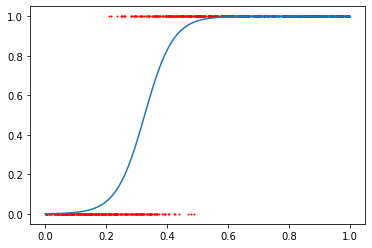

In the image above, the x and y axis correspond to the variables defined previously, with **the red "dots" the true data as generated by the process defined below, and the blue line is the optimal logistic decision function learned from the data**.

The optimal parameters can be found numerically using gradient descent. In this case, we will be using SGD (batched gradient descent) to optimize the two parameters in the logistic function, $\beta_1, \beta_2$.

If ${p(x)={\frac {1}{1+e^{-(\beta _{1}+\beta _{2}x)}}}}$, then we want to find $\beta_1, \beta_2$ such that the [negative log likelihood](https://en.wikipedia.org/wiki/Likelihood_function) is minimized. In this case, ${\ell =\sum _{k=1}^{K}\left(\,y_{k}\ln(p_{k})+(1-y_{k})\ln(1-p_{k})\right)}$, and the SGD formula is simply:
$\beta_i = \beta_{i-1} - \alpha * \nabla \ell$.

**The data generation process as well as the pseudo-code is provided for you below, your task is to fill in the appropriate pytorch code. *Do not use the built-in optimizer*, implement SGD using tensor operations alone.**


In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [ ]:
# For reproducibility
torch.manual_seed(3)

In [ ]:
# fixme: agregar tests para esta celda, aunque NO tiene código mío.
def generate_data():
  data = torch.rand(1000, 2)
  label = ((data[:,0]+0.3*data[:,1]) > 0.5).to(torch.int) #fixme: why does he do this?
  return data[:,0], label

Loss: 22.14712905883789
Loss: 20.886449813842773
Loss: 17.729074478149414
Loss: 14.984260559082031
Loss: 18.824121475219727
Loss: 18.797021865844727
Loss: 16.75469207763672
Loss: 15.88896369934082
Loss: 16.003225326538086
Loss: 13.419294357299805
Loss: 15.594013214111328
Loss: 12.254057884216309
Loss: 10.364975929260254
Loss: 14.274443626403809
Loss: 9.790668487548828
Loss: 14.352476119995117
Loss: 12.564419746398926
Loss: 10.88703727722168
Loss: 10.396328926086426
Loss: 12.59537124633789
Loss: 13.69104290008545
Loss: 12.19120979309082
Loss: 10.992257118225098
Loss: 12.158005714416504
Loss: 11.268655776977539
Loss: 9.546442031860352
Loss: 9.995362281799316
Loss: 11.640313148498535
Loss: 10.977800369262695
Loss: 11.853557586669922
Loss: 10.408225059509277
Loss: 1.8098206520080566
Loss: 13.117205619812012
Loss: 9.62712287902832
Loss: 8.121256828308105
Loss: 8.052849769592285
Loss: 11.694347381591797
Loss: 12.076536178588867
Loss: 10.821837425231934
Loss: 9.001903533935547
Loss: 9.2369432

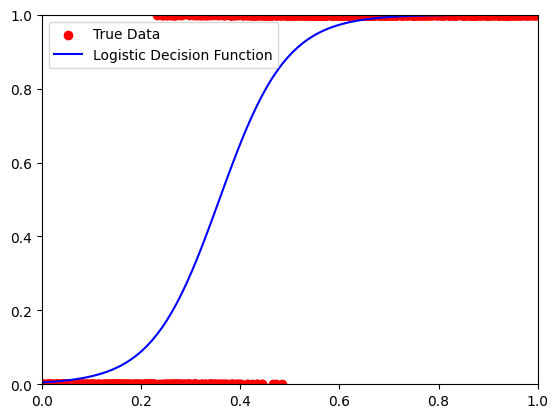

In [ ]:
# fixme: agregar test para esta celda, que tiene código mío.
# fixme: consultar que cosas tengo que implementar para este tipo de soluciones, para todos los problemas.
input, label = generate_data() # input = torch.Size([1000]), label = torch.Size([1000])


# Make minibatches.
inputs = torch.split(input, 32) # 31 minibatches of torch.Size([32]), the last one (the 32nd) of torch.Size([8])
labels = torch.split(label, 32) # 31 minibatches of torch.Size([32]), the last one (the 32nd) of torch.Size([8])

# Assert that all batches of labels contain only 0s and 1s
for batch_labels in labels:
    assert ((batch_labels == 0) | (batch_labels == 1)).all().item(), "labels should contain only 0s and 1s"

# Define the two variables to optimize
b1 = torch.autograd.Variable(torch.tensor([0.01]), requires_grad=True) # b1: tensor of size [1]. "requires_grad=True" flag ensures that gradients will be calculated for b1 during backpropagation.
b2 = torch.autograd.Variable(torch.tensor([0.01]), requires_grad=True) # b2: tensor of size [1]

# Learning rate
alpha = 0.082

# Lists to store b1, b2, and losses
b1_values = []
b2_values = []
losses = []


# Store values for plotting before updating parameters
b1_values.append(b1.item())
b2_values.append(b2.item())

for epoch in range(15):
  # Initialize loss variable for this epoch
  for x, y in zip(inputs,labels): # x: tensor of size [32] or [8], y: tensor of size [32] or [8]
    # Calculate p_x as per formula above. p_x is the sigmoid function. The formula calculates the probability p(x) that x belongs to a particular class.
    p_x = (lambda x, b1, b2: 1 / (1 + torch.exp(-(b1 + b2 * x))))(x, b1, b2) # p_x: tensor of size [32] or [8]

    # Calculate the negative loss likelihood
    loss = -(y * torch.log(p_x) + (1 - y) * torch.log(1 - p_x)) # loss: tensor of size [32] or [8]
    # Sum the losses across the batch dimension to get a scalar value
    loss = torch.sum(loss) # loss: scalar tensor
    # Calculate the gradient of the loss w.r.t. the inputs
    loss.backward()
    # Store values for plotting before updating parameters
    losses.append(loss.item())

    # Update the parameters b according to SGD formula
    with torch.no_grad():
      b1 -= alpha * b1.grad # b1.grad: tensor of size [1]
      b2 -= alpha * b2.grad # b2.grad: tensor of size [1]
      # Store values for plotting before updating parameters
      b1_values.append(b1.item())
      b2_values.append(b2.item())
      losses.append(loss.item())

      #Manually zero the gradients after updating, to prevent gradient accumulation across iterations. In stochastic gradient descent (SGD) and its variants, you typically compute gradients and then update model parameters based on these gradients. If gradients accumulate across iterations, parameter updates would not reflect the gradient of the current mini-batch alone, but rather a cumulative effect of multiple mini-batches.
      b1.grad.zero_()
      b2.grad.zero_()

    # Print out the loss value
    print(f"Loss: {loss}")

# Final values of b1 and b2 after training
final_b1 = b1.item()
final_b2 = b2.item()

print(f"Final values: b1 = {final_b1}, b2 = {final_b2}")

# Reproduce the image above to validate your result.
# Plotting the results
plt.figure()

# Plot the true data points
plt.scatter(input.numpy(), label.numpy(), color='red', label='True Data')

# Plot the logistic decision function
with torch.no_grad():
    x_decision = torch.linspace(0, 1, 100) # x_decision: tensor of size [100]
    p_decision = torch.sigmoid(final_b1 + final_b2 * x_decision) # p_decision: tensor of size [100]
    plt.plot(x_decision.numpy(), p_decision.numpy(), linestyle='-', color='blue', label='Logistic Decision Function')

plt.legend()
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

In [ ]:
# Run the check on your collected loss values
check_loss_behavior(losses)

The loss is mostly decreasing with minor fluctuations.
Loss decrease is slow (slope: -0.0278). Consider decreasing the learning rate or other adjustments.
Initial loss: 8.5524, Final loss: 0.2036, Total improvement: 8.3488


# Part 2-1

Researchers have measured a bivariate timeseries, but the equipment was unreliable so the data has gaps as well as noise. The data can be found in [data.csv](https://gist.github.com/tmramalho/51733432c88e2b834dbd70353849f887)

In this exercise, we want to train an [MLP](https://en.wikipedia.org/wiki/Multilayer_perceptron) to regress the full observed trajectory from the measured data. Formally, the MLP will be used to approximate the function $f:\mathbb{R} \rightarrow \mathbb{R}^2 ; f(t) = (x(t), y(t))$. In other words, the model takes the current time as an input, and predicts the values of `x` and `y` at that time based only on the measured data.

Your task is to define the data loader, the MLP model and the loss function to complete this task successfully. **For this problem you will need to use a regression loss, not a classification loss**.

Successful training should result in a data interpolation similar to the below:
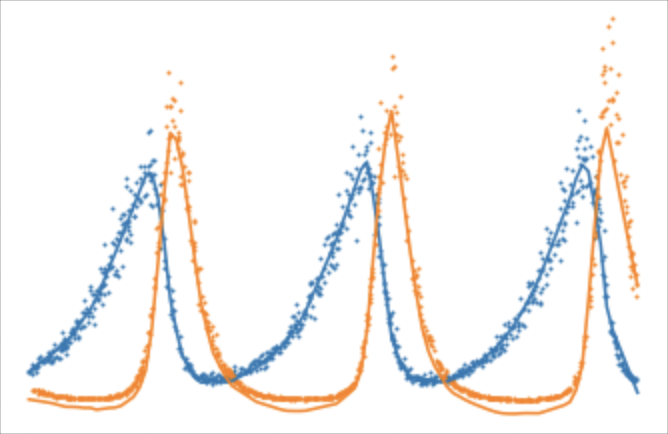

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd
from scipy.signal import savgol_filter
# from scipy.optimize import curve_fit # fixme: comentado porque creo que no se usa, si no se rompe nada, la puedo borrar.


HIDDEN_DIM = 32  # Define hidden dimension here # Fixme: esto lo agregué yo. # fixme: creo que tiene que corresponderse con el largo de DATASET_TYPE, en este caso es un float32 (pero esto también lo elegí yo arbitrariamente).
BATCH_SIZE = 32  # Fixme: esto lo agregué yo porque el ejercicio original tenía BATCH_SIZE, pero en ningún lado lo instanciaba. Fixme: probar con distintos valores de BATCH_SIZE a ver cómo cambia la performance.
DATASET_TYPE = np.float32
EPOCHS = 300
DATASET_URL = 'https://gist.githubusercontent.com/tmramalho/51733432c88e2b834dbd70353849f887/raw/676636d9e8512963005a318cb9b98060feadb641/data.csv'
# Set pandas display options to show more precision
pd.set_option('display.precision', 16) # Fixme: esto es solo para debugging, cuando lo termine, puedo borrar esta línea. # Fixme: tengo que ver que pasa si cambio la precisssion, ya vi que si pongo mayor a 16, aparecen valore que no están en el csv, tengo que estar seguro de que estos valores no afectan cálculos posteriores.

In [ ]:
# fixme: tener cuidado con esto:
"""
If your loss remains at 0 for many iterations in a regression problem, it usually indicates that your model has perfectly fit the data points in your training set, predicting the exact target values. However, this situation can arise from several scenarios, some desirable and some problematic:

Possible Reasons:
Perfect Fit:
Your model has learned the relationship between input and output so well that it predicts the exact values, resulting in a perfect fit. This might occur in simple problems with straightforward relationships or small datasets.

Data Leakage:
There could be data leakage where the model has access to information it shouldn't have during training, such as target values or correlated features from the test set, leading to a perfect prediction.

Overfitting:
If your model is overly complex relative to the data size (e.g., using a deep neural network on a small dataset), it might memorize the training data perfectly, resulting in zero loss on the training set but poor performance on unseen data.

Inadequate Loss Calculation or Implementation Error:
A bug in your loss function implementation or evaluation loop might always return zero, making it appear as though the model is performing perfectly when it might not be.

Extremely Simple Problem:
In some very straightforward regression tasks, the relationship between inputs and outputs might be so direct that the model has no difficulty predicting the exact values.

What to Do:
Check Validation/Testing Performance: Ensure that you evaluate your model on a separate validation or test set to confirm that it generalizes well. If the loss is zero only on training data, but much higher on validation or test data, overfitting is likely.

Inspect for Data Leakage: Review your data preprocessing and ensure that no information from the target variables is leaking into your input features during training.

Examine Your Loss Function: Double-check the implementation of your loss function to make sure it's correctly calculating the loss. Print intermediate values if necessary to verify.

Simplify Your Model: If the model is highly complex, consider simplifying it or using regularization techniques to prevent overfitting.

If you need help diagnosing this further, feel free to share more details about your model and dataset setup!
"""

"\nIf your loss remains at 0 for many iterations in a regression problem, it usually indicates that your model has perfectly fit the data points in your training set, predicting the exact target values. However, this situation can arise from several scenarios, some desirable and some problematic:\n\nPossible Reasons:\nPerfect Fit:\nYour model has learned the relationship between input and output so well that it predicts the exact values, resulting in a perfect fit. This might occur in simple problems with straightforward relationships or small datasets.\n\nData Leakage:\nThere could be data leakage where the model has access to information it shouldn't have during training, such as target values or correlated features from the test set, leading to a perfect prediction.\n\nOverfitting:\nIf your model is overly complex relative to the data size (e.g., using a deep neural network on a small dataset), it might memorize the training data perfectly, resulting in zero loss on the training set

In [ ]:
# Fixme: falta testear, evaluar esta clase.

# The model uses three fully connected layers to balance model capacity and prevent overfitting.
# Three layers provide sufficient depth to learn complex non-linear relationships while minimizing risks
# of vanishing or exploding gradients, which are common in deeper networks. This configuration
# leverages the Universal Approximation Theorem, offering an optimal balance between simplicity
# and performance for the given noisy and incomplete time series regression task.

import torch
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(3, HIDDEN_DIM)  # Input size is 3 (for 't', 'x', 'y', corresponding to time and two observed values), output size is HIDDEN_DIM,  output size is HIDDEN_DIM.
        self.relu = nn.ReLU()  # ReLU activation function introduces non-linearity to the model.
        self.fc2 = nn.Linear(HIDDEN_DIM, HIDDEN_DIM)  # Second fully connected layer for deeper representation. Input size is HIDDEN_DIM, output size is HIDDEN_DIM.
        # Output size is 2 (for predicting 'x' and 'y').
        self.fc3 = nn.Linear(HIDDEN_DIM, 2)   # Final layer outputs the two target values for regression. Input size is HIDDEN_DIM, output size is 2 (for predicting 'x' and 'y').

    def forward(self, x):
        x = self.fc1(x)  # Pass input through the first layer
        x = self.relu(x)  # Apply ReLU to introduce non-linearity
        x = self.fc2(x)  # Pass through the second fully connected layer to deepen representation
        x = self.relu(x)  # Apply ReLU again for further non-linearity
        x = self.fc3(x)  # Final layer to produce the regression outputs for 'x' and 'y'
        return x  # Return the output values


In [ ]:
class TimeSeriesDataset(torch.utils.data.Dataset):

    def __init__(self, csv_url):
        # Load CSV file from URL into pandas DataFrame
        self.data = pd.read_csv(csv_url)

        # Round time column to a suitable precision
        self.data['t'] = self.data['t'].round(3)  # Round to 3 decimal places to reduce precision errors and simplify data

        # Replace "-" with NaN and convert x, y columns to float
        self.data['x'] = pd.to_numeric(self.data['x'], errors='coerce')
        self.data['y'] = pd.to_numeric(self.data['y'], errors='coerce')

        # Handle missing values (NaN) using forward fill and interpolation
        self.data['x'].fillna(method='ffill', inplace=True)  # Forward fill replaces NaNs with the last valid value, maintaining data continuity which is essential in time series where the previous value is assumed to hold until the next valid observation.
        self.data['y'].interpolate(method='linear', inplace=True)  # Linear interpolation fills NaNs by estimating values between surrounding points, creating smoother transitions and preserving the trend of the data without abrupt changes.

        # Fill NaN values in 'x' with the first valid value in the column
        first_valid_x = self.data['x'].dropna().iloc[0]   # Gets the first valid value in 'x' to handle residual NaNs
        self.data['x'].fillna(first_valid_x, inplace=True)  # Ensures no NaNs remain by filling with first valid value

        first_valid_y = self.data['y'].dropna().iloc[0]  # Get the first valid value in 'y' to handle residual NaNs
        self.data['y'].fillna(first_valid_y, inplace=True)  # Ensures no NaNs remain by filling with first valid value

    def __len__(self):
        return len(self.data)  # Returns the number of samples in the dataset

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()  # Converts tensor index to list for DataFrame access

        time = self.data.iloc[idx, 0]
        x = self.data.iloc[idx, 1]
        y = self.data.iloc[idx, 2]

        # Return 't', 'x', and 'y' as inputs, 'x' and 'y' as labels
        inputs = torch.tensor([time, x, y], dtype=torch.float32)  # Converts inputs to tensors for model compatibility
        labels = torch.tensor([x, y], dtype=torch.float32)        # Converts labels to tensors for training

        return inputs, labels # Returns inputs and labels for training the model

In [ ]:
dataset = TimeSeriesDataset(DATASET_URL) # Create an instance of the TimeSeriesDataset class with the provided URL

# Create a DataLoader to efficiently load data during training
trainloader = torch.utils.data.DataLoader(
    dataset,  # Pass the dataset object which provides samples
    batch_size=BATCH_SIZE,  # Defines the number of samples to be loaded per batch, crucial for managing memory and training speed
    shuffle=True,  # Shuffle the data at the start of each epoch to help the model generalize better by breaking any order in the data
    num_workers=2  # Number of subprocesses used for data loading; using more workers speeds up data loading by parallelizing the process
)

<ipython-input-9-326303f2de1c>:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  self.data['x'].fillna(method='ffill', inplace=True)  # Forward fill replaces NaNs with the last valid value, maintaining data continuity which is essential in time series where the previous value is assumed to hold until the next valid observation.


In [ ]:
def loss_fn(outputs, labels):
  """
  Define the loss function used for training the neural network.

  Args:
    outputs (torch.Tensor): The output of the neural network.
    labels (torch.Tensor): The ground truth labels.

  Returns:
    loss (torch.Tensor): The computed loss.
  """
  # Initialize Mean Squared Error (MSE) loss function: it measures the average of the squares of the errors—that is, the difference between predicted values and the true values.
  criterion = nn.MSELoss()

  # Calculate the loss by comparing the model's predictions (outputs) with the actual labels (ground truth)
  loss = criterion(outputs, labels)

  # Return the computed loss value, which represents how far off the predictions are from the true values
  return loss

net = Net()

optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9) # Initialize Stochastic Gradient Descent (SGD) optimizer with a learning rate of 0.001 and momentum of 0.9. Momentum, in the context of optimization algorithms like Stochastic Gradient Descent (SGD), is a technique used to accelerate convergence and dampen oscillations during training. It's particularly useful in scenarios where the cost function (loss) has steep, narrow valleys, or when the training data is noisy.

In [ ]:
dataset.data  # Display the loaded and preprocessed DataFrame containing the time series data.

,t,x,y
0,0.0000000000000000,1.1159124144549086,0.5759052335487023
1,0.0100000000000000,1.1159124144549086,0.5513106076237239
2,0.0200000000000000,1.1159124144549086,0.5267159816987456
3,0.0300000000000000,1.1159124144549086,0.5021213557737672
4,0.0400000000000000,1.0054825084650338,0.4775267298487888
...,...,...,...
1995,19.9499999999999993,0.6079444564717553,4.1863610582149597
1996,19.9600000000000009,0.6079444564717553,4.1863610582149597
1997,19.9699999999999989,0.6079444564717553,4.1863610582149597
1998,19.9800000000000004,0.6229927832618664,4.1863610582149597


In [ ]:
for epoch in range(EPOCHS): # Loop over the dataset multiple times (EPOCHS for training)

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad() # Clear gradients from the previous step to avoid accumulation

        # forward + backward + optimize
        outputs = net(inputs) # Forward pass: compute the network's predictions on the inputs
        loss = loss_fn(outputs, labels) # Calculate the loss between predictions and actual labels
        loss.backward() # Backward pass: compute the gradient of the loss with respect to model parameters
        optimizer.step() # Update model parameters using the computed gradients

        # Add a print statement to label the columns before printing statistics
        if epoch == 0 and i == 0:  # Print labels only once at the start of the training process
            print('[Epoch, Batch] Average Loss')  # Print labels for the columns

        # print statistics
        running_loss += loss.item()  # Accumulate the loss value for tracking progress
        if i % 20 == 19:    # print every 20 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 20))  # Print epoch, batch number, and average loss
            running_loss = 0.0 # Reset running loss after printing

print('Finished Training')

[Epoch, Batch] Average Loss
[1,    20] loss: 6.551
[1,    40] loss: 1.117
[1,    60] loss: 0.196
[2,    20] loss: 0.055
[2,    40] loss: 0.026
[2,    60] loss: 0.023
[3,    20] loss: 0.016
[3,    40] loss: 0.011
[3,    60] loss: 0.012
[4,    20] loss: 0.009
[4,    40] loss: 0.007
[4,    60] loss: 0.008
[5,    20] loss: 0.007
[5,    40] loss: 0.006
[5,    60] loss: 0.005
[6,    20] loss: 0.005
[6,    40] loss: 0.005
[6,    60] loss: 0.005
[7,    20] loss: 0.005
[7,    40] loss: 0.004
[7,    60] loss: 0.004
[8,    20] loss: 0.004
[8,    40] loss: 0.004
[8,    60] loss: 0.004
[9,    20] loss: 0.003
[9,    40] loss: 0.004
[9,    60] loss: 0.003
[10,    20] loss: 0.003
[10,    40] loss: 0.003
[10,    60] loss: 0.003
[11,    20] loss: 0.003
[11,    40] loss: 0.003
[11,    60] loss: 0.003
[12,    20] loss: 0.003
[12,    40] loss: 0.003
[12,    60] loss: 0.002
[13,    20] loss: 0.002
[13,    40] loss: 0.002
[13,    60] loss: 0.002
[14,    20] loss: 0.002
[14,    40] loss: 0.002
[14,    60] los

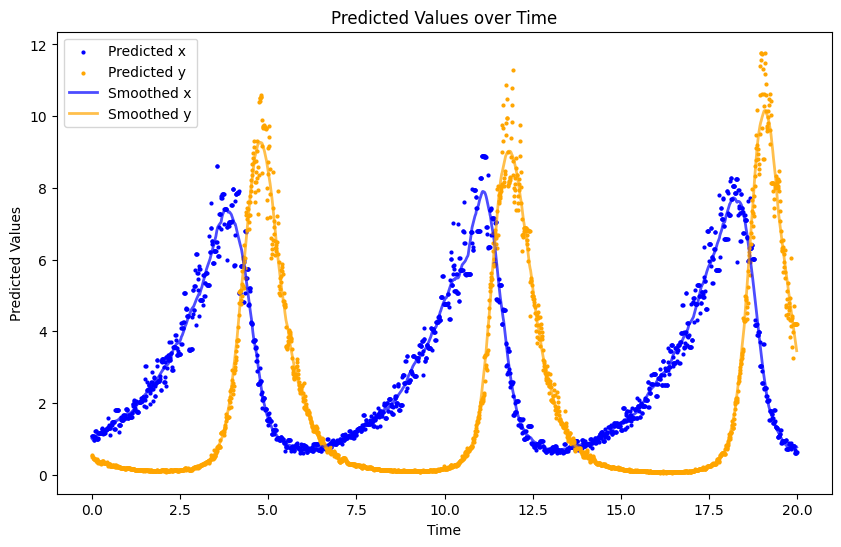

In [ ]:
# Plot results to validate training
# Fixme: revisar y entender bien esta celda. Sobre todo que representan los puntos y la línea suave del plot.
net.eval()  # Set the model to evaluation mode

predicted_x = []
predicted_y = []
time_values = []

# Iterate over the dataset to gather predictions and time values
with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        outputs = net(inputs)

        predicted_x.extend(outputs[:, 0].tolist())
        predicted_y.extend(outputs[:, 1].tolist())
        time_values.extend(inputs[:, 0].tolist())

# Convert lists to numpy arrays for plotting
predicted_x = np.array(predicted_x)
predicted_y = np.array(predicted_y)
time_values = np.array(time_values)

# Sort the values by time to plot the line correctly
sorted_indices = np.argsort(time_values)
sorted_time_values = time_values[sorted_indices]
sorted_predicted_x = predicted_x[sorted_indices]
sorted_predicted_y = predicted_y[sorted_indices]

# Apply  Savitzky-Golay filter to smooth the sorted predicted values
smooth_predicted_x = savgol_filter(sorted_predicted_x, window_length=101, polyorder=2)  # Adjusted for smoother results
smooth_predicted_y = savgol_filter(sorted_predicted_y, window_length=101, polyorder=2)  # Adjusted for smoother results

# Plotting Section with Smooth Lines using Savitzky-Golay Filter
plt.figure(figsize=(10, 6))

# Scatter plot for predicted values colored by 'x' and 'y'
plt.scatter(time_values, predicted_x, color='blue', s=4, label='Predicted x')
plt.scatter(time_values, predicted_y, color='orange', s=4, label='Predicted y')

# Plot the smoothed lines
plt.plot(sorted_time_values, smooth_predicted_x, color='blue', alpha=0.7, linewidth=2, label='Smoothed x')  # Smooth line for x values
plt.plot(sorted_time_values, smooth_predicted_y, color='orange', alpha=0.7, linewidth=2, label='Smoothed y')  # Smooth line for y values

plt.xlabel('Time')
plt.ylabel('Predicted Values')
plt.title('Predicted Values over Time')
plt.legend()

plt.show()

# Part 2-2 Time-series extension

The simplified model above will only work well if $t\in[0,20]$.
Create a different model that can extrapolate `x,y` predictions to $t>20$.
Assume that the model has access to the same data as above, and is tasked to predict up to $t=100$. You can change anything in the above setup as needed, including model architecture, loss function, training procedure or data loader.

There are several different correct approaches to tackle this problem, all with different pros and cons, so make sure to explain your reasoning for the different choices made.


### Fixme: my explanation:

The simplified model above will only work well if t∈[0,20] because it was trained on data within this range. Extrapolating beyond this range means predicting values for t>20 without having seen data for these values during training. Neural networks, especially MLPs, are known to struggle with extrapolation tasks since they are primarily designed to interpolate within the range of the training data.

Given the cyclical nature of the data and the requirement to predict up to t = 100 using data available up to t = 20, a few strategies can be employed:

1. Recognize the cyclical pattern and leverage it for extrapolation.
2. Employ a more advanced model capable of capturing long-term dependencies and periodic behavior.

### Strategy
#### 1. Cyclical Pattern Recognition:

Since the data is cyclical, we can use this to our advantage by identifying the period and using models that can leverage this information.

#### 2. Advanced Model:

Use a Recurrent Neural Network (RNN) with a focus on Long Short-Term Memory (LSTM) networks or Gated Recurrent Units (GRUs) which are good at learning from time-series data.
Consider Fourier Transforms to identify dominant frequencies if the cycles are not obvious.

#### 3. Data Preparation:

Even though we only have data up to t=20, the model should learn the cyclical pattern within this range and use it for extrapolation.


In [ ]:
# Fixme: leer de bidirectional LSTMs antes de la entrevista.
#Fixme: pedir explicaciones a GPT de todas las funciones de esta sección.

Epoch [10/100], Training Loss: 0.0018, Validation Loss: 0.0050
Epoch [20/100], Training Loss: 0.0017, Validation Loss: 0.0032
Epoch [30/100], Training Loss: 0.0015, Validation Loss: 0.0030
Epoch [40/100], Training Loss: 0.0014, Validation Loss: 0.0038
Epoch [50/100], Training Loss: 0.0013, Validation Loss: 0.0029
Epoch [60/100], Training Loss: 0.0013, Validation Loss: 0.0029
Epoch [70/100], Training Loss: 0.0012, Validation Loss: 0.0045
Epoch [80/100], Training Loss: 0.0011, Validation Loss: 0.0033
Epoch [90/100], Training Loss: 0.0011, Validation Loss: 0.0030
Epoch [100/100], Training Loss: 0.0010, Validation Loss: 0.0038


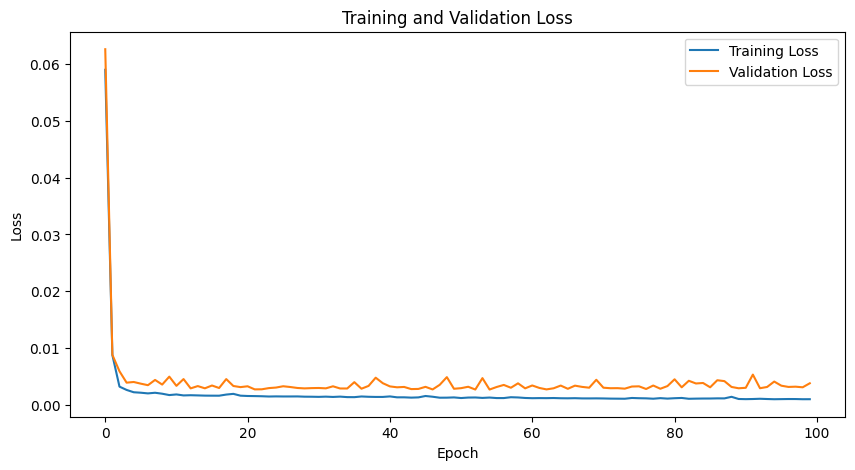

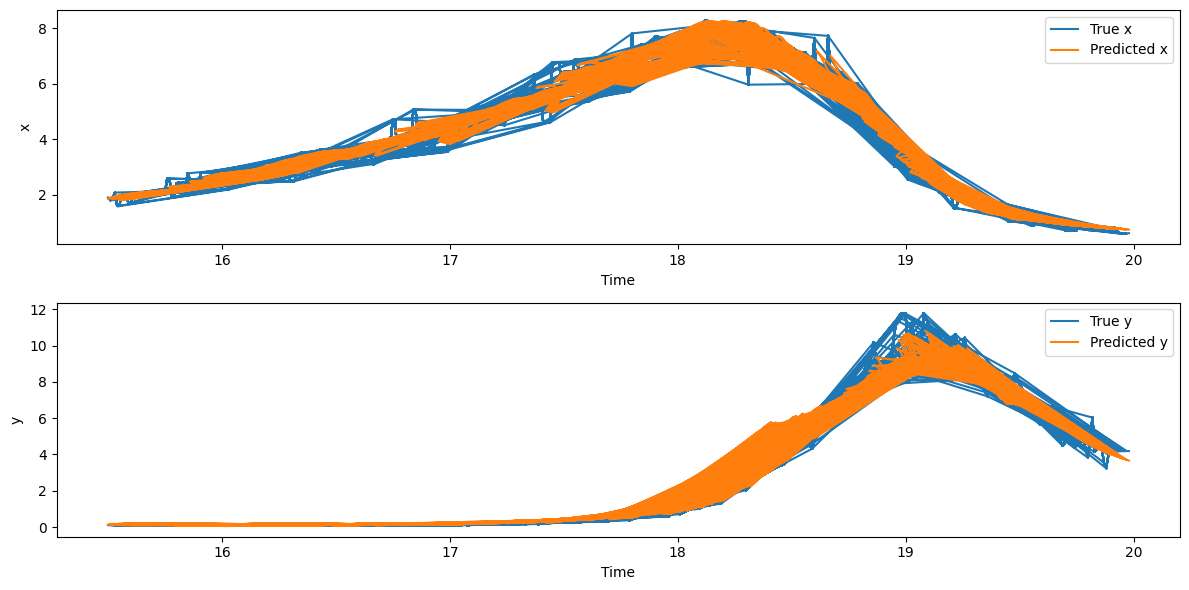

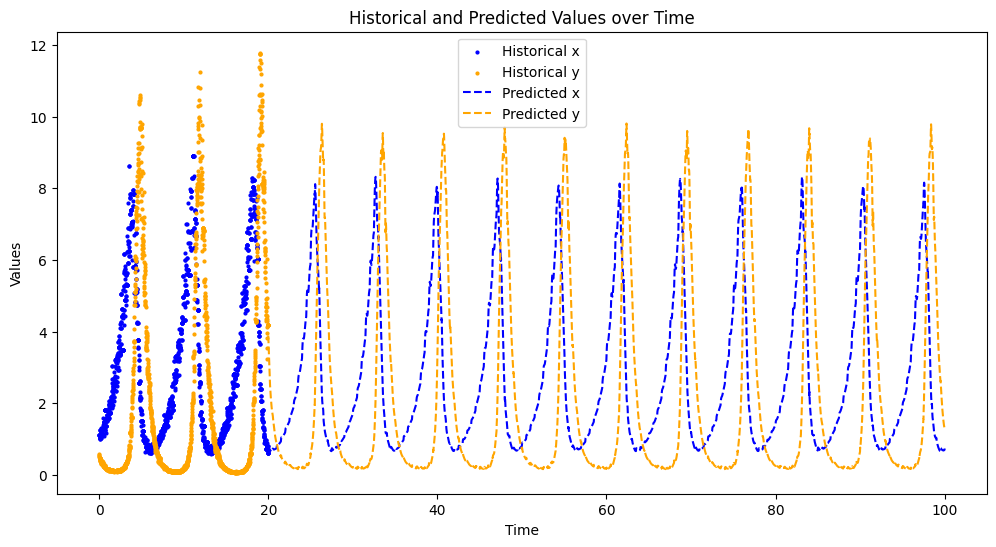

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import torch.nn as nn
import torch.optim as optim

# Parameters
LR = 0.001
HIDDEN_SIZE = 64
NUM_LAYERS = 2
NUM_EPOCHS = 100
SEQ_LENGTH = 50  # Input sequence length
PRED_LENGTH = 50  # Output sequence length
BATCH_SIZE = 32

DATASET_URL = 'https://gist.githubusercontent.com/tmramalho/51733432c88e2b834dbd70353849f887/raw/676636d9e8512963005a318cb9b98060feadb641/data.csv'

# Load the data
data = pd.read_csv(DATASET_URL)

# Data cleaning and preprocessing
data.replace("-", np.nan, inplace=True)
data = data.apply(pd.to_numeric, errors='coerce')
data['t'] = data['t'].round(3)
data['x'] = data['x'].ffill()
data['y'] = data['y'].interpolate(method='linear')
first_valid_x = data['x'].dropna().iloc[0]
data['x'].fillna(first_valid_x, inplace=True)
first_valid_y = data['y'].dropna().iloc[0]
data['y'].fillna(first_valid_y, inplace=True)

# Normalize the data between 0 and 1
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(data[['x', 'y']])
scaled_data = pd.DataFrame(scaled_features, columns=['x', 'y'])
scaled_data['t'] = data['t']

# Prepare sequences for Seq2Seq
class Seq2SeqDataset(Dataset):
    def __init__(self, data, input_len, pred_len):
        self.data = data
        self.input_len = input_len
        self.pred_len = pred_len

    def __len__(self):
        return len(self.data) - self.input_len - self.pred_len

    def __getitem__(self, idx):
        input_seq = self.data[['x', 'y']].iloc[idx:idx+self.input_len].values
        target_seq = self.data[['x', 'y']].iloc[idx+self.input_len:idx+self.input_len+self.pred_len].values
        return torch.tensor(input_seq, dtype=torch.float32), torch.tensor(target_seq, dtype=torch.float32)

# Split data into training and validation sets
n_samples = len(scaled_data)
train_size = int(n_samples * 0.8)
train_data = scaled_data.iloc[:train_size]
val_data = scaled_data.iloc[train_size - SEQ_LENGTH - PRED_LENGTH:]

train_dataset = Seq2SeqDataset(train_data, SEQ_LENGTH, PRED_LENGTH)
val_dataset = Seq2SeqDataset(val_data, SEQ_LENGTH, PRED_LENGTH)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define the Seq2Seq Model with Attention
class Encoder(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(Encoder, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)

    def forward(self, x):
        outputs, (hidden, cell) = self.lstm(x)
        return outputs, hidden, cell

class Attention(nn.Module):
    def __init__(self, hidden_size):
        super(Attention, self).__init__()
        self.attn = nn.Linear(hidden_size + hidden_size, SEQ_LENGTH)
        self.v = nn.Parameter(torch.rand(SEQ_LENGTH))

    def forward(self, hidden, encoder_outputs):
        hidden = hidden[-1].unsqueeze(2)  # (batch_size, hidden_size, 1)
        attn_weights = torch.bmm(encoder_outputs, hidden).squeeze(2)  # (batch_size, seq_len)
        attn_weights = torch.softmax(attn_weights, dim=1)
        return attn_weights

class Decoder(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(Decoder, self).__init__()
        self.hidden_size = hidden_size
        self.attention = Attention(hidden_size)
        self.lstm = nn.LSTM(input_size + hidden_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, hidden, cell, encoder_outputs):
        x = x.unsqueeze(1)  # (batch_size, 1, input_size)
        attn_weights = self.attention(hidden, encoder_outputs)
        attn_applied = torch.bmm(attn_weights.unsqueeze(1), encoder_outputs)  # (batch_size, 1, hidden_size)
        x = torch.cat((x, attn_applied), dim=2)  # (batch_size, 1, input_size + hidden_size)
        outputs, (hidden, cell) = self.lstm(x, (hidden, cell))
        predictions = self.fc(outputs.squeeze(1))
        return predictions, hidden, cell, attn_weights

class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, pred_len):
        super(Seq2Seq, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.pred_len = pred_len

    def forward(self, source, target=None, teacher_forcing_ratio=0.5):
        batch_size = source.size(0)
        outputs = torch.zeros(batch_size, self.pred_len, 2).to(device)

        encoder_outputs, hidden, cell = self.encoder(source)
        decoder_input = source[:, -1, :]  # Last input

        for t in range(self.pred_len):
            output, hidden, cell, _ = self.decoder(decoder_input, hidden, cell, encoder_outputs)
            outputs[:, t, :] = output
            teacher_force = np.random.random() < teacher_forcing_ratio
            if teacher_force and target is not None and t < target.size(1):
                decoder_input = target[:, t, :]
            else:
                decoder_input = output

        return outputs

input_size = 2  # x and y
output_size = 2  # x and y
hidden_size = HIDDEN_SIZE
num_layers = NUM_LAYERS

encoder = Encoder(input_size, hidden_size, num_layers).to(device)
decoder = Decoder(input_size, hidden_size, num_layers, output_size).to(device)
model = Seq2Seq(encoder, decoder, PRED_LENGTH).to(device)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=LR)

# Training loop
train_losses = []
val_losses = []

for epoch in range(NUM_EPOCHS):
    # Training phase
    model.train()
    train_loss = 0.0
    for inputs, targets in train_loader:
        inputs = inputs.to(device)
        targets = targets.to(device)

        optimizer.zero_grad()
        outputs = model(inputs, targets)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    avg_train_loss = train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Validation phase
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs = inputs.to(device)
            targets = targets.to(device)
            outputs = model(inputs, targets, teacher_forcing_ratio=0)
            loss = criterion(outputs, targets)
            val_loss += loss.item()

    avg_val_loss = val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    # Print losses every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{NUM_EPOCHS}], Training Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}')

# Plot training and validation losses
plt.figure(figsize=(10,5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Evaluate on validation data
model.eval()
val_predictions = []
val_targets = []
val_times = []

with torch.no_grad():
    for idx, (inputs, targets) in enumerate(val_loader):
        inputs = inputs.to(device)
        targets = targets.to(device)
        outputs = model(inputs, teacher_forcing_ratio=0)
        val_predictions.append(outputs.cpu().numpy())
        val_targets.append(targets.cpu().numpy())

        # Get corresponding times
        batch_start = idx * BATCH_SIZE
        batch_end = batch_start + inputs.size(0)
        for i in range(inputs.size(0)):
            start_idx = batch_start + i + SEQ_LENGTH
            end_idx = start_idx + PRED_LENGTH
            time_seq = val_data['t'].iloc[start_idx:end_idx].values
            val_times.append(time_seq)

val_predictions = np.concatenate(val_predictions, axis=0)
val_targets = np.concatenate(val_targets, axis=0)
val_times = np.concatenate(val_times, axis=0)

# Inverse transform predictions and targets
n_samples = val_predictions.shape[0] * val_predictions.shape[1]
val_predictions_reshaped = val_predictions.reshape(n_samples, 2)
val_targets_reshaped = val_targets.reshape(n_samples, 2)

predictions_original_scale = scaler.inverse_transform(val_predictions_reshaped)
targets_original_scale = scaler.inverse_transform(val_targets_reshaped)

# Plot predictions vs true values
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.plot(val_times, targets_original_scale[:,0], label='True x')
plt.plot(val_times, predictions_original_scale[:,0], label='Predicted x')
plt.xlabel('Time')
plt.ylabel('x')
plt.legend()

plt.subplot(2,1,2)
plt.plot(val_times, targets_original_scale[:,1], label='True y')
plt.plot(val_times, predictions_original_scale[:,1], label='Predicted y')
plt.xlabel('Time')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

# Predict future values up to t = 100
model.eval()
with torch.no_grad():
    # Use the last SEQ_LENGTH data points as input
    input_seq = scaled_data[['x', 'y']].iloc[-SEQ_LENGTH:].values
    input_seq = torch.tensor(input_seq, dtype=torch.float32).unsqueeze(0).to(device)

    delta_t = data['t'].values[1] - data['t'].values[0]
    last_t = data['t'].values[-1]
    future_t = [last_t + delta_t * (i+1) for i in range(PRED_LENGTH)]

    outputs = model(input_seq, teacher_forcing_ratio=0)
    future_predictions = outputs.cpu().numpy().squeeze(0)
    future_predictions_original_scale = scaler.inverse_transform(future_predictions)

    # If we need to predict up to t=100, we need to loop
    total_future_steps = int((100 - last_t) / delta_t)
    total_predictions = []
    total_times = []

    current_input = input_seq.clone()

    for _ in range(total_future_steps // PRED_LENGTH + 1):
        outputs = model(current_input, teacher_forcing_ratio=0)
        preds = outputs.cpu().numpy().squeeze(0)
        preds_torch = outputs.detach()

        future_predictions_original_scale = scaler.inverse_transform(preds)
        total_predictions.append(future_predictions_original_scale)

        # Update times
        if len(total_times) == 0:
            start_t = last_t + delta_t
        else:
            start_t = total_times[-1][-1] + delta_t
        times = [start_t + delta_t * i for i in range(PRED_LENGTH)]
        total_times.append(times)

        # Prepare input for next iteration
        current_input = torch.cat((current_input[:, PRED_LENGTH:, :], preds_torch), dim=1)
        if current_input.size(1) > SEQ_LENGTH:
            current_input = current_input[:, -SEQ_LENGTH:, :]

    total_predictions = np.concatenate(total_predictions, axis=0)
    total_times = np.concatenate(total_times, axis=0)

    # Truncate to t=100
    mask = total_times <= 100
    future_x = total_predictions[mask][:, 0]
    future_y = total_predictions[mask][:, 1]
    future_t = total_times[mask]

# Plotting
plt.figure(figsize=(12,6))

# Plot historical x and y
plt.scatter(data['t'], data['x'], color='blue', s=4, label='Historical x')
plt.scatter(data['t'], data['y'], color='orange', s=4, label='Historical y')

# Plot future predictions
plt.plot(future_t, future_x, color='blue', linestyle='--', label='Predicted x')
plt.plot(future_t, future_y, color='orange', linestyle='--', label='Predicted y')

plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Historical and Predicted Values over Time')
plt.legend()
plt.show()


# Part 3-1a

Please implement the below function `min_dist`. This function should take a sparse list of 2D coordinates, and map them to a 2D tensor of a specified resolution. The values of each pixel in the tensor should correspond to the [euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance) between that pixel and the closest pixel which contains a data point.

You can use either numpy or pytorch tensor operations to implement the function. Use only tensor operations, no for-loops are necessary.

Here are the example outputs for the two test cases highlighted below:

Case 1: data at `[0.4, 0.3], [0.6, 0.7]`, resolution 20 pixels.

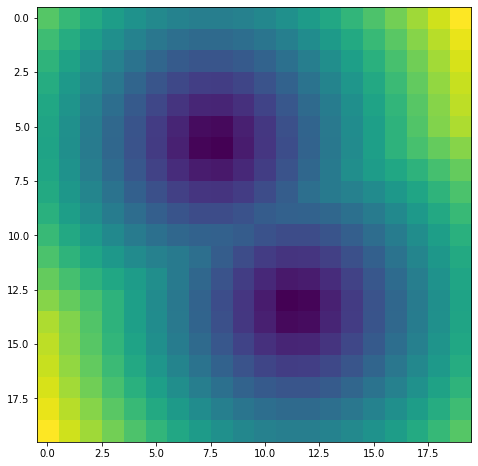


Case 2: data at `[0.4, 0.3], [0.6, 0.7], [0.3, 0.8], [0.5, 0.2]`, resolution 256 pixels.

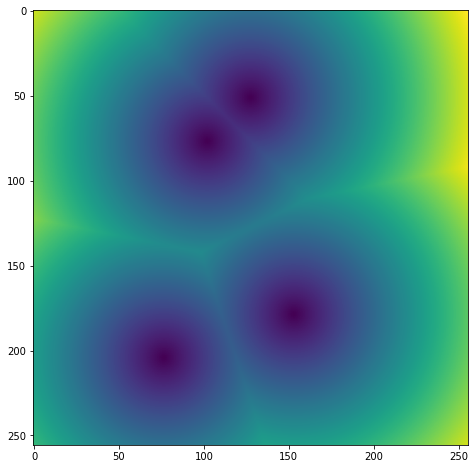


In [9]:
# Fixme: función revisada y comentada, no hace falta aclarar nada, salvo que quiera repasar la solución.

def min_dist(points, res):
  """Calculates a 2D tensor with the minimum distance from each pixel to data.

  Inputs:
    * points: a python list of 2D coordinates, normalized in the range [0,1]
    * res: the resolution of the output tensor.
  Returns:
    A res x res square tensor with floating point values corresponding to the
    euclidean distance to the closest point in points.
  """
  # Convert points to a tensor and normalize to [0, res-1] range
  points = torch.tensor(points, dtype=torch.float32) * (res - 1)

  # Create a grid of coordinates (x, y) for each pixel in the output tensor
  # `torch.linspace` generates `res` evenly spaced values between 0 and res-1 for both x and y
  x = torch.linspace(0, res - 1, res)
  y = torch.linspace(0, res - 1, res)

  # `torch.meshgrid` creates a coordinate grid using these vectors
  grid_x, grid_y = torch.meshgrid(x, y, indexing='xy')

  # Flatten the grid to have coordinates for each pixel
  # `grid_x.flatten()` and `grid_y.flatten()` convert the 2D grids into 1D vectors
  # `torch.stack` then combines these vectors into a single 2D tensor with shape (res*res, 2)
  grid_coords = torch.stack([grid_x.flatten(), grid_y.flatten()], dim=1)
  """
   The resulting grid_coords tensor provides a list of coordinates for each pixel in the 2D grid.
   Like the following:
   (tensor([[0., 0.],
        [1., 0.],
        [2., 0.],
        [3., 0.],
        [4., 0.],
        [0., 1.],
        [1., 1.],
        [2., 1.],
        [3., 1.],...)
   Each row in grid_coords corresponds to the (x, y) coordinates of a pixel in the original 2D space.
   This is useful for tasks that need to perform operations based on pixel locations.
  """

  # Compute the Euclidean distance from each pixel to each point
  # `torch.cdist` computes the pairwise Euclidean distances between each pixel and each point
  # grid_coords and points do not need to have the same shape, in teh example:
  # grid_coords.dim() torch.Size([400, 2])
  # points.dim() torch.Size([2, 2])
  dist = torch.cdist(grid_coords, points)
  """
  The dist tensor is a 2D tensor of shape [res * res, num_points], where:
  Each row corresponds to a pixel in the grid.
  Each column corresponds to a point from the input list of points.
  Each element dist[i, j] represents the Euclidean distance between the i-th pixel and the j-th point.
  """


  # Find the minimum distance to the nearest point
  # `torch.min` returns the minimum value along the specified dimension (dim=1, i.e., across each row).
  # [0] is used to get the minimum values themselves, not their indices
  min_dist = torch.min(dist, dim=1)[0]

  # Reshape to the resolution of the output tensor
  # `min_dist.reshape(res, res)` reshapes the 1D tensor of minimum distances back into a 2D tensor
  min_dist = min_dist.reshape(res, res)

  return min_dist

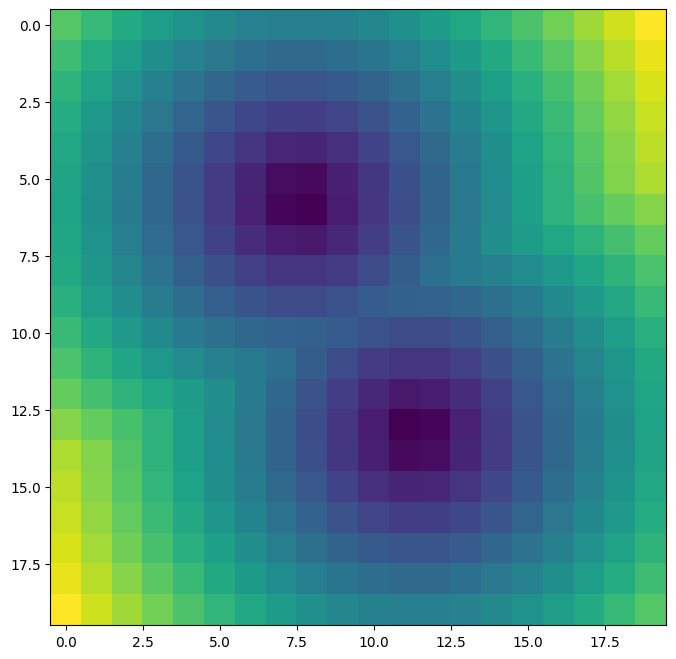

In [ ]:
# Case 1:
distance_to_data = min_dist([[0.4, 0.3], [0.6, 0.7]], 20)
plt.figure(figsize=(8, 8))
plt.imshow(distance_to_data)

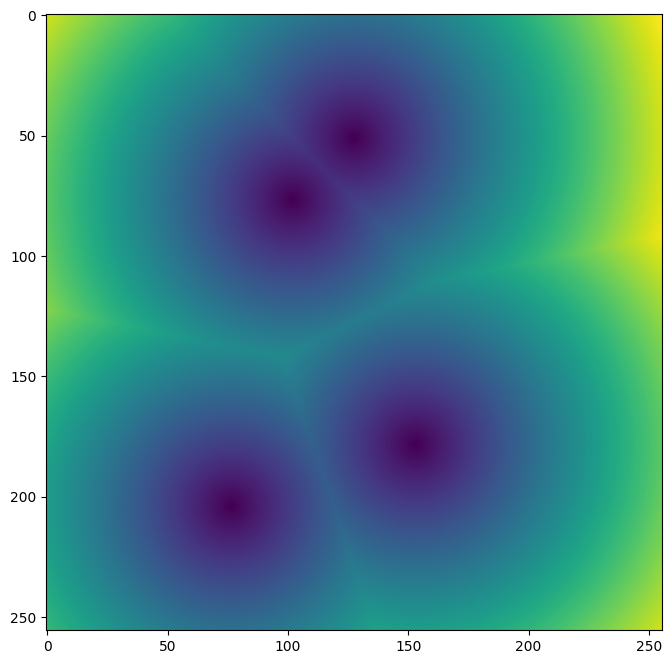

In [ ]:
# Case 2:
distance_to_data = min_dist([[0.4, 0.3], [0.6, 0.7], [0.3, 0.8], [0.5, 0.2]], 256)
plt.figure(figsize=(8, 8))
plt.imshow(distance_to_data)

# Part 3-1b: Batched version

As a next step, improve the `min_dist` function to support batches.
The `points` array is now expected to be a tensor with shape [batch_size, num_points, 3], generated by `create_points`.
`min_dist` should return a batch of maps with shape [batch_size, res, res].
Again, make sure to implement `min_dist` using **no for-loops**.
Demonstrate your function output with `batch_size=3` and `num_points=4`.

In [ ]:
#Fixme: lo siguiente es agregado por mi, escrito por GPT:

To extend the min_dist function to support batched inputs, the following steps are excecuted:

1. Handle Batched Points: Adjust the function to process the input tensor with shape [batch_size, num_points, 2], which includes a batch dimension.

2. Compute Distances: For each batch, calculate the Euclidean distance from each pixel to each point. This requires expanding dimensions to properly handle the batch structure.

3. Find Minimum Distances: After computing the distances, determine the minimum distance for each pixel by evaluating distances across all points within the batch.

In [ ]:
# Fixme: acomodar imports cuando termine.
import numpy as np
import torch

In [ ]:
# Fixme: agregar comentarios explicando las decisiones tomadas.

In [ ]:
np.random.seed(seed=0)

In [ ]:
# Fixme: esta función es dada por la consigna tal cuál está.
def create_points(batch_size, num_points):
  coords = np.random.rand(batch_size, num_points, 2)
  return coords

In [ ]:
# Fixme: leer esta función y considerar pedir justificaciones de cada decisión.
# Fixme: borrar los imports innecesarios de la función de abajo.

In [62]:
# Fixme: voy por acá: los plots que generan esta función, están rotados respecto de lo que como yo quisiera que están.
def min_dist_batched(points, res):
    """Calculates a 3D tensor with the minimum distance from each pixel to data.

    Inputs:
        * points: a numpy array or list of 2D coordinates, normalized to
                  be in the range [0,1]. The expected shape is [B, P, 2] or [P, 2].
        * res: the resolution of the output tensor.
    Returns:
        A tensor of shape [B, res, res] with floating point values corresponding to the
        Euclidean distance to the closest point in `points`.
    """
    import torch

    # Convert points to a tensor and ensure it's a float
    points = torch.tensor(points, dtype=torch.float32)

    # Determine if the input is batched
    if points.dim() == 3:
        batch_size, num_points, _ = points.shape
    elif points.dim() == 2:
        batch_size = 1
        num_points = points.shape[0]
        points = points.unsqueeze(0)  # Add batch dimension
    else:
        raise ValueError("Invalid input shape for points.")

    # Scale points to [0, res - 1] range
    points = points * (res - 1)

    # Create a grid of coordinates (x, y) for each pixel
    x = torch.linspace(0, res - 1, res)
    y = torch.linspace(0, res - 1, res)
    grid_x, grid_y = torch.meshgrid(x, y, indexing='xy')

    # Flatten the grid to have coordinates for each pixel
    # Swap grid_x and grid_y here
    grid_coords = torch.stack([grid_x.flatten(), grid_y.flatten()], dim=1)

    # Expand dimensions to handle batch
    grid_coords = grid_coords.unsqueeze(0).expand(batch_size, -1, -1)

    # Compute the Euclidean distance from each pixel to each point
    dist = torch.cdist(grid_coords, points)

    # Find the minimum distance to the nearest point
    min_distances = dist.min(dim=2)[0]

    # Reshape to [batch_size, res, res]
    min_distances = min_distances.view(batch_size, res, res)

    # No need to transpose in this case
    # min_distances = min_distances.transpose(1, 2)

    return min_distances

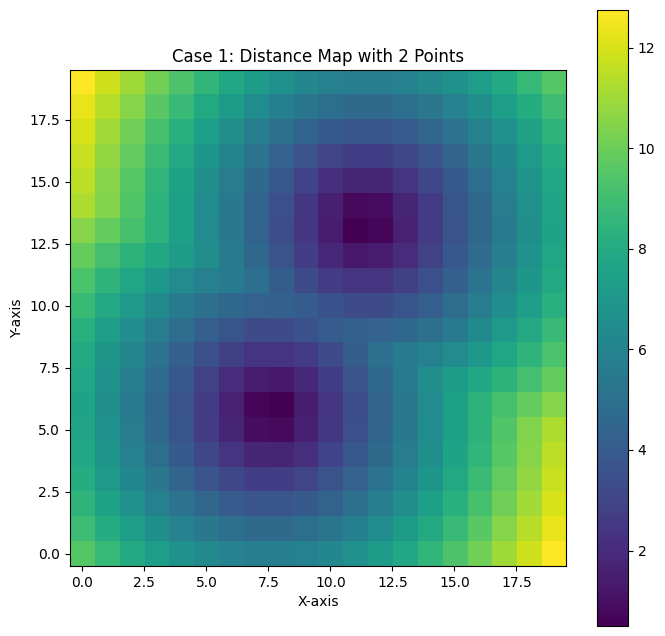

In [63]:
# Fixme: celda agregada por mi, siguiendo lo que plantea la consigna del ejercicio. Pero no estoy seguro de que el plot sea correcto.
import matplotlib.pyplot as plt

# Case 1: Points and resolution
points_case1 = [[0.4, 0.3], [0.6, 0.7]]
res1 = 20

# Compute the distance map
distance_to_data_case1 = min_dist_batched(points_case1, res1)


# Plot the distance map
plt.figure(figsize=(8, 8))
plt.imshow(distance_to_data_case1[0], origin='lower', cmap='viridis')
plt.colorbar()
plt.title('Case 1: Distance Map with 2 Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

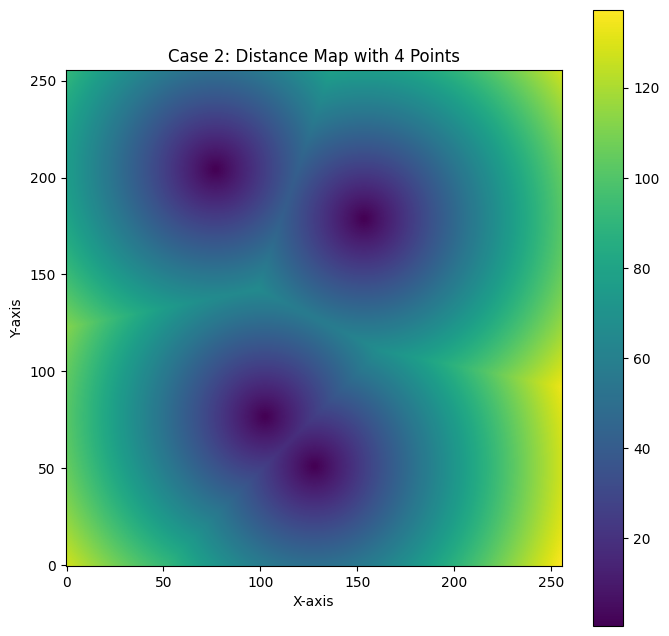

In [64]:
# Case 2: Points and resolution
points_case2 = [[0.4, 0.3], [0.6, 0.7], [0.3, 0.8], [0.5, 0.2]]
res2 = 256

# Compute the distance map
distance_to_data_case2 = min_dist_batched(points_case2, res2)

# Plot the distance map
plt.figure(figsize=(8, 8))
plt.imshow(distance_to_data_case2[0], origin='lower', cmap='viridis')
plt.colorbar()
plt.title('Case 2: Distance Map with 4 Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()


In [ ]:
points = [[0.4, 0.3], [0.6, 0.7]]
res = 256

# Compute distance maps
distance_to_data_non_batched = min_dist(points, res)  # Shape: (256, 256)
distance_to_data_batched = min_dist_batched(points, res)[0]  # Shape: (256, 256)


In [ ]:
print(f"Shape of distance_to_data_non_batched: {distance_to_data_non_batched.shape}")
print(f"Shape of distance_to_data_batched: {distance_to_data_batched.shape}")


Shape of distance_to_data_non_batched: torch.Size([256, 256])
Shape of distance_to_data_batched: torch.Size([256, 256])


In [ ]:
difference = torch.abs(distance_to_data_non_batched - distance_to_data_batched)
max_difference = difference.max()
print(f"Maximum difference between non-batched and batched outputs: {max_difference.item()}")


Maximum difference between non-batched and batched outputs: 36.06230926513672


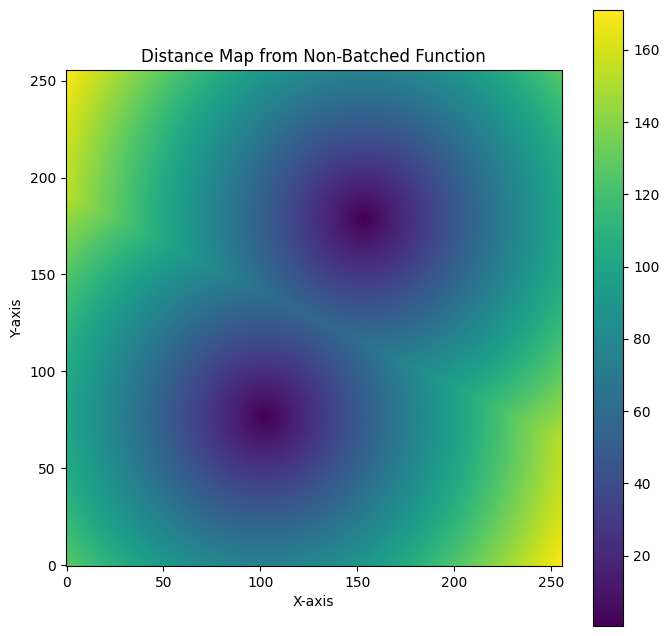

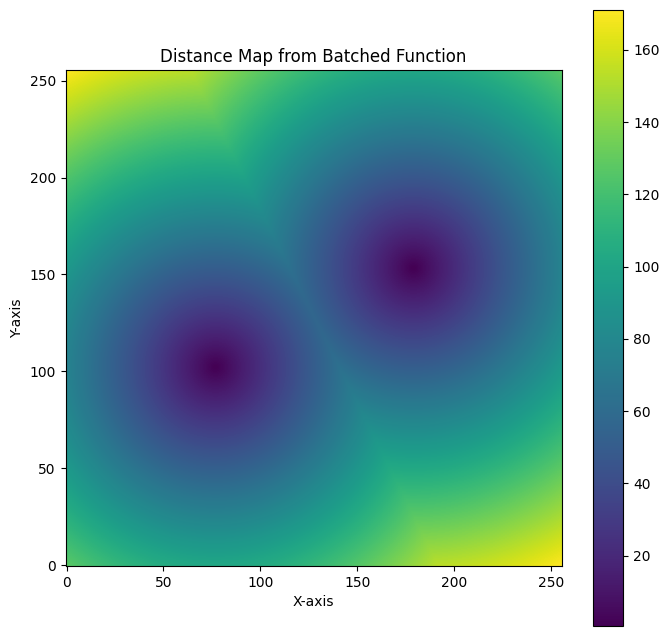

In [ ]:
# Plot the distance map from the non-batched function
plt.figure(figsize=(8, 8))
plt.imshow(distance_to_data_non_batched, origin='lower', cmap='viridis')
plt.colorbar()
plt.title('Distance Map from Non-Batched Function')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

# Plot the distance map from the batched function
plt.figure(figsize=(8, 8))
plt.imshow(distance_to_data_batched, origin='lower', cmap='viridis')
plt.colorbar()
plt.title('Distance Map from Batched Function')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()


# Part 3-2: Scalable version

Assume `res` can be very large (up to 65,536). Running the above function will likely cause the computer's RAM to be filled up, and fail (on a free colab instance, even 16,384 `res` will crash with `batch_size=3` and `num_points=4`).
Extend the above version of `min_dist` to calculate the result tensor at such high resolution without running out of RAM. This function may be less computationally efficient, as long as it can successfully run.

In [17]:
# Fixme: the function of this point should not be called batched.
# Fixme: no estoy segro de que la resolucón pueda ser 65556 x 655536 o máx 256x256.
# FIxme:

In [55]:
import torch

def min_dist_scalable_batched(points, res, block_size=512, device='cpu'):
    """
    Calculates a batch of 2D tensors with the minimum Euclidean distance from each pixel to the nearest data point.
    This implementation is scalable to very high resolutions by processing the grid in smaller blocks.

    Inputs:
        * points: a torch tensor of shape [batch_size, num_points, 2], normalized in the range [0, 1].
        * res: the resolution of the output tensor (e.g., 65536 for a 65536 x 65536 grid).
        * block_size: the size of the blocks to process at a time (default: 512).
        * device: the device to perform computations on ('cpu' or 'cuda').

    Returns:
        A torch tensor of shape [batch_size, res, res] with floating-point values corresponding to the
        Euclidean distance to the closest point in `points`.
    """

    # Move points to the specified device and scale them to [0, res - 1]
    points = points.to(device) * (res - 1)

    batch_size, num_points, _ = points.shape

    # Initialize the output tensor with infinity
    min_dist_map = torch.full((batch_size, res, res), float('inf'), device=device)

    # Iterate over the grid in blocks
    for i_start in range(0, res, block_size):
        i_end = min(i_start + block_size, res)
        for j_start in range(0, res, block_size):
            j_end = min(j_start + block_size, res)

            # Generate grid coordinates for the current block with absolute positions
            x = torch.linspace(j_start, j_end - 1, j_end - j_start, device=device)
            y = torch.linspace(i_start, i_end - 1, i_end - i_start, device=device)
            grid_x, grid_y = torch.meshgrid(x, y, indexing='xy')  # Swapped to correct ordering
            grid_coords = torch.stack([grid_x, grid_y], dim=-1)  # Shape: [block_height, block_width, 2]
            grid_coords = grid_coords.view(-1, 2)  # Shape: [block_size*block_size, 2]

            # Expand grid_coords to match the batch size
            grid_coords_expanded = grid_coords.unsqueeze(0).expand(batch_size, -1, -1)  # [B, S, 2]

            # Compute the differences between grid coordinates and points
            # points: [B, P, 2] -> [B, 1, P, 2]
            # grid_coords_expanded: [B, S, 2] -> [B, S, 1, 2]
            diff = grid_coords_expanded.unsqueeze(2) - points.unsqueeze(1)  # [B, S, P, 2]

            # Compute squared Euclidean distances
            dist_sq = diff.pow(2).sum(dim=-1)  # [B, S, P]

            # Compute Euclidean distances
            dist = torch.sqrt(dist_sq)  # [B, S, P]

            # Find the minimum distance across all points
            min_dist_block, _ = dist.min(dim=2)  # [B, S]

            # Reshape min_dist_block to [B, block_height, block_width]
            block_height = i_end - i_start
            block_width = j_end - j_start
            min_dist_block = min_dist_block.view(batch_size, block_height, block_width)

            # Assign the computed minimum distances to the appropriate block in the output tensor
            min_dist_map[:, i_start:i_end, j_start:j_end] = min_dist_block

    return min_dist_map


Shape of distance_to_data_case1: torch.Size([1, 256, 256])


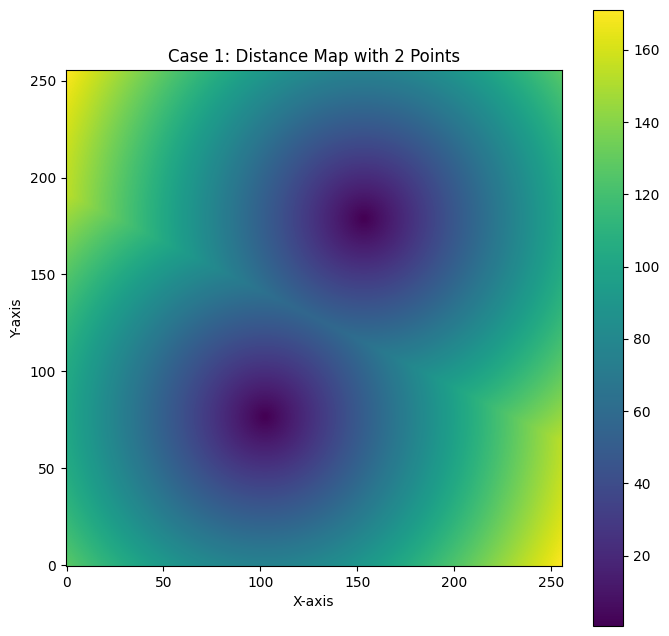

Shape of distance_to_data_case2: torch.Size([1, 256, 256])


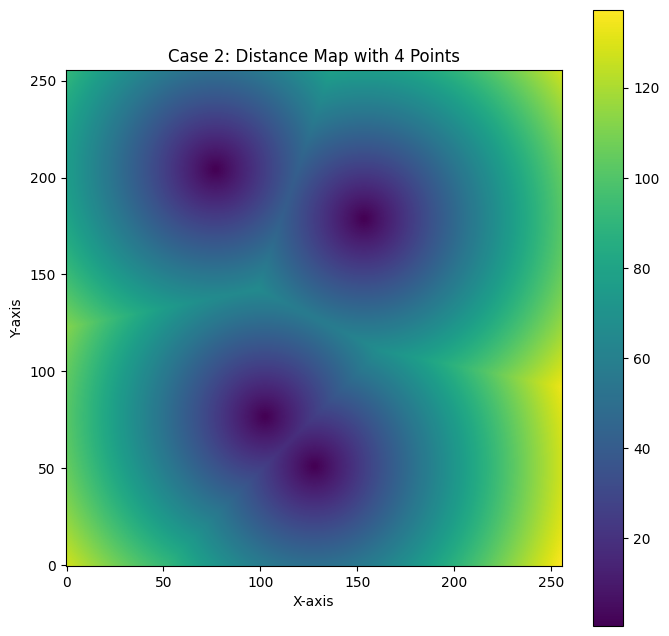

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# fixme: esta función está definida por mí. La diferencia con la versión que traía la consigna es que hace .astype(np.float32), no sé si está bien que la redefina.
def create_points(batch_size, num_points):
    coords = np.random.rand(batch_size, num_points, 2).astype(np.float32)
    return torch.tensor(coords, dtype=torch.float32)


# Function to visualize distance maps
def plot_distance_map(distance_map, title):
    plt.figure(figsize=(8, 8))
    plt.imshow(distance_map, origin='lower', cmap='viridis')
    plt.colorbar()
    plt.title(title)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.show()

# Test Case 1: Small resolution
points_case1 = torch.tensor([[[0.4, 0.3], [0.6, 0.7]]], dtype=torch.float32)  # Shape: [1, 2, 2]
res1 = 256

distance_to_data_case1 = min_dist_scalable_batched(points_case1, res1, block_size=10)

print(f"Shape of distance_to_data_case1: {distance_to_data_case1.shape}")
plot_distance_map(distance_to_data_case1[0].cpu().numpy(), 'Case 1: Distance Map with 2 Points')

# Test Case 2: Larger resolution
points_case2 = torch.tensor([
    [[0.4, 0.3], [0.6, 0.7], [0.3, 0.8], [0.5, 0.2]]
], dtype=torch.float32)  # Shape: [1, 4, 2]
res2 = 256

distance_to_data_case2 = min_dist_scalable_batched(points_case2, res2, block_size=64)

print(f"Shape of distance_to_data_case2: {distance_to_data_case2.shape}")
plot_distance_map(distance_to_data_case2[0].cpu().numpy(), 'Case 2: Distance Map with 4 Points')


Using device: cuda


<ipython-input-46-4c8d06de450c>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  points = torch.tensor(points, dtype=torch.float32)


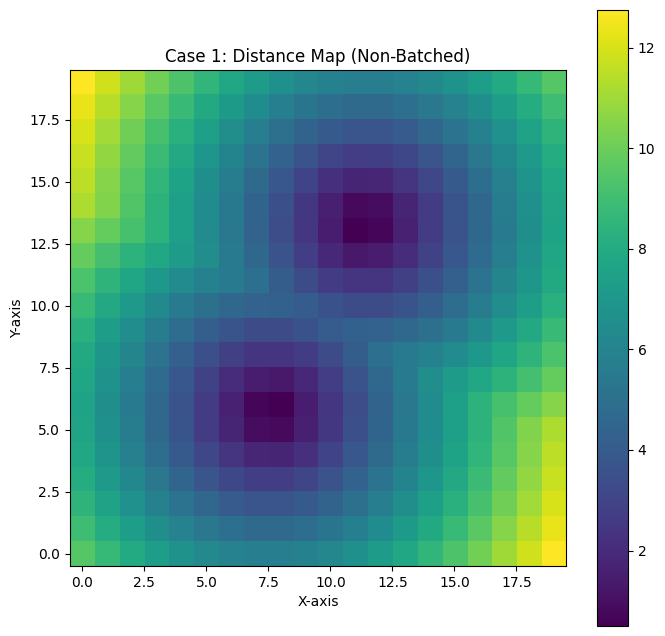

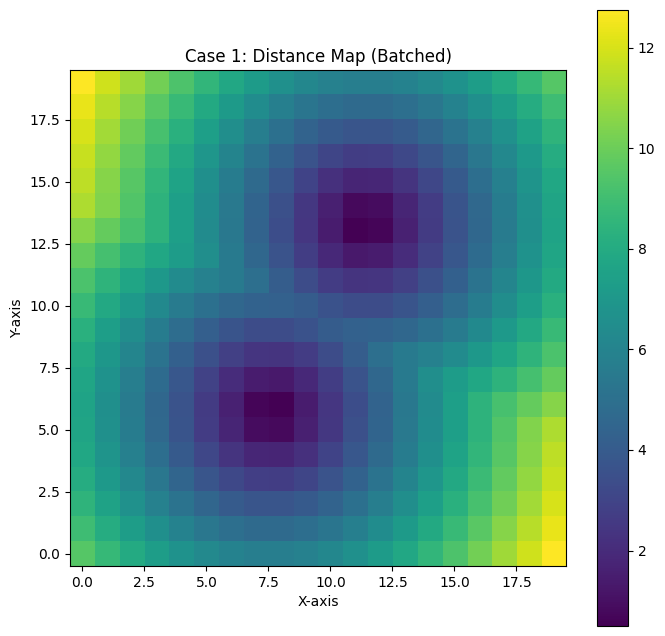

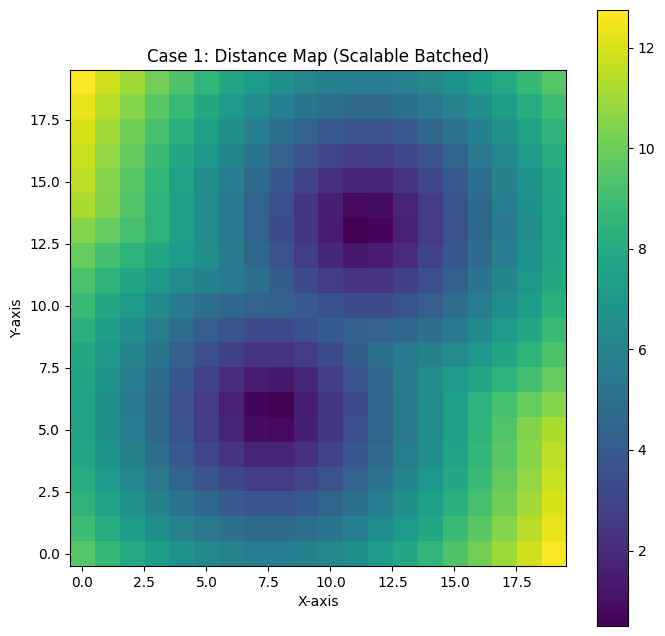

Case 1: Maximum difference between non-batched and scalable batched: 3.1054019927978516e-05
Case 1: Maximum difference between non-batched and batched: 0.0
Case 1: Maximum difference between non-batched and scalable batched: 3.1054019927978516e-05


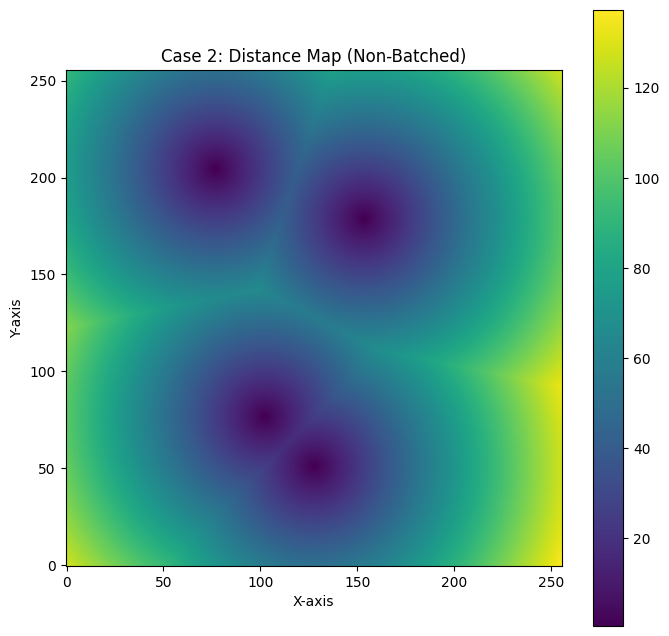

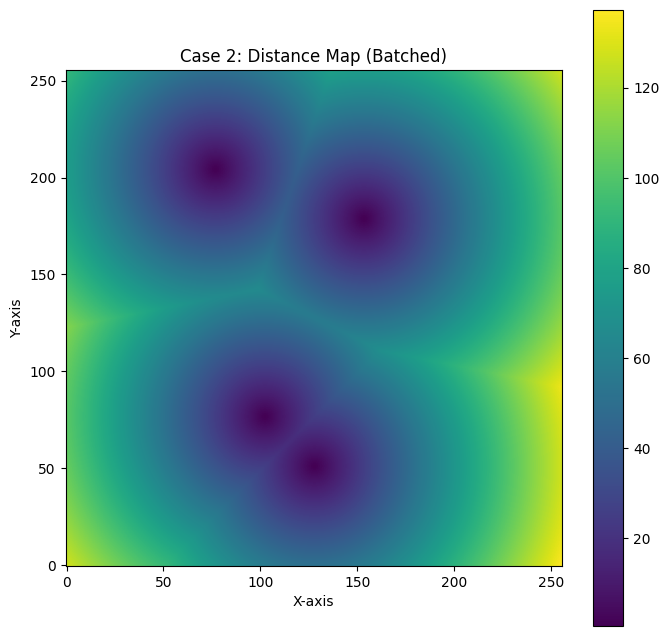

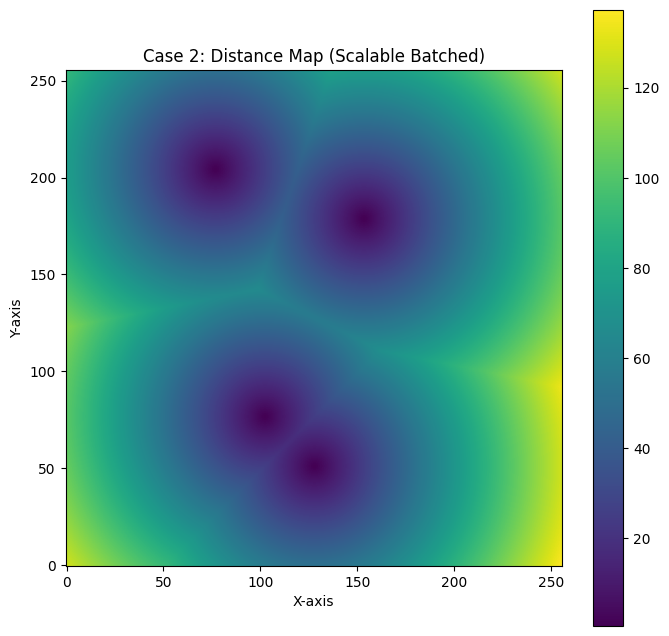

Case 2: Maximum difference between non-batched and batched: 0.0
Case 2: Maximum difference between non-batched and scalable batched: 1.52587890625e-05


In [57]:
# ==========================
# Plot Generation and Verification
# ==========================

# Device configuration: Use 'cuda' if available, else 'cpu'
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

# --------------------------
# Test Case 1: Resolution 20
# --------------------------

# Define points and resolution for Case 1
points_case1 = [[0.4, 0.3], [0.6, 0.7]]
res1 = 20

# Compute distance maps using all three functions
distance_non_batched_case1 = min_dist(points_case1, res1)  # Shape: (20, 20)

# Prepare batched input for min_dist_batched
points_batched_case1 = torch.tensor([points_case1], dtype=torch.float32)  # Shape: [1, 2, 2]
distance_batched_case1 = min_dist_batched(points_batched_case1, res1)[0]  # Shape: (20, 20)

# Prepare batched input for min_dist_scalable_batched
distance_scalable_batched_case1 = min_dist_scalable_batched(points_batched_case1, res1, block_size=10, device=device)[0]  # Shape: (20, 20)

# Plotting
plot_distance_map(distance_non_batched_case1.numpy(), 'Case 1: Distance Map (Non-Batched)')
plot_distance_map(distance_batched_case1.numpy(), 'Case 1: Distance Map (Batched)')
plot_distance_map(distance_scalable_batched_case1.cpu().numpy(), 'Case 1: Distance Map (Scalable Batched)')

# Verify consistency for Case 1
difference_scalable_case1 = torch.abs(distance_non_batched_case1 - distance_scalable_batched_case1.cpu())
max_diff_scalable_case1 = difference_scalable_case1.max().item()
print(f"Case 1: Maximum difference between non-batched and scalable batched: {max_diff_scalable_case1}")


# Verify consistency
difference_case1 = torch.abs(distance_non_batched_case1 - distance_batched_case1)
max_diff_case1 = difference_case1.max().item()
print(f"Case 1: Maximum difference between non-batched and batched: {max_diff_case1}")

difference_scalable_case1 = torch.abs(distance_non_batched_case1 - distance_scalable_batched_case1.cpu())
max_diff_scalable_case1 = difference_scalable_case1.max().item()
print(f"Case 1: Maximum difference between non-batched and scalable batched: {max_diff_scalable_case1}")

# --------------------------
# Test Case 2: Resolution 256
# --------------------------

# Define points and resolution for Case 2
points_case2 = [[0.4, 0.3], [0.6, 0.7], [0.3, 0.8], [0.5, 0.2]]
res2 = 256

# Compute distance maps using all three functions
distance_non_batched_case2 = min_dist(points_case2, res2)  # Shape: (256, 256)

# Prepare batched input for min_dist_batched
points_batched_case2 = torch.tensor([points_case2], dtype=torch.float32)  # Shape: [1, 4, 2]
distance_batched_case2 = min_dist_batched(points_batched_case2, res2)[0]  # Shape: (256, 256)

# Prepare batched input for min_dist_scalable_batched
distance_scalable_batched_case2 = min_dist_scalable_batched(points_batched_case2, res2, block_size=64, device=device)[0]  # Shape: (256, 256)

# Plotting
plot_distance_map(distance_non_batched_case2.numpy(), 'Case 2: Distance Map (Non-Batched)')
plot_distance_map(distance_batched_case2.numpy(), 'Case 2: Distance Map (Batched)')
plot_distance_map(distance_scalable_batched_case2.cpu().numpy(), 'Case 2: Distance Map (Scalable Batched)')

# Verify consistency
difference_case2 = torch.abs(distance_non_batched_case2 - distance_batched_case2)
max_diff_case2 = difference_case2.max().item()
print(f"Case 2: Maximum difference between non-batched and batched: {max_diff_case2}")

difference_scalable_case2 = torch.abs(distance_non_batched_case2 - distance_scalable_batched_case2.cpu())
max_diff_scalable_case2 = difference_scalable_case2.max().item()
print(f"Case 2: Maximum difference between non-batched and scalable batched: {max_diff_scalable_case2}")